# Newton's Method: Introduction

In the previous lessons, we learned how to find the minimum of a function using Gradient Descent. **Newton's method** is another powerful, iterative algorithm. However, its primary purpose is different: it's designed to find the **roots (or zeros)** of a function—the points where the function crosses the x-axis, i.e., where `f(x) = 0`.

We can then cleverly adapt this root-finding algorithm for optimization.

---
## The Intuition: Riding the Tangent Line

Newton's method is an iterative process for approximating a function's root. The core idea is:

1.  **Start** at a random point `x₀` on the curve.
2.  **Draw the tangent line** to the curve at that point.
3.  **Find the root of the tangent line.** Follow the tangent line down until it crosses the x-axis. This crossing point is our new, better guess, `x₁`.
4.  **Repeat.** Draw a new tangent line at `x₁`, find where it crosses the x-axis to get `x₂`, and so on.

As you can see in the visualization, this process converges on the true root of the function incredibly quickly.

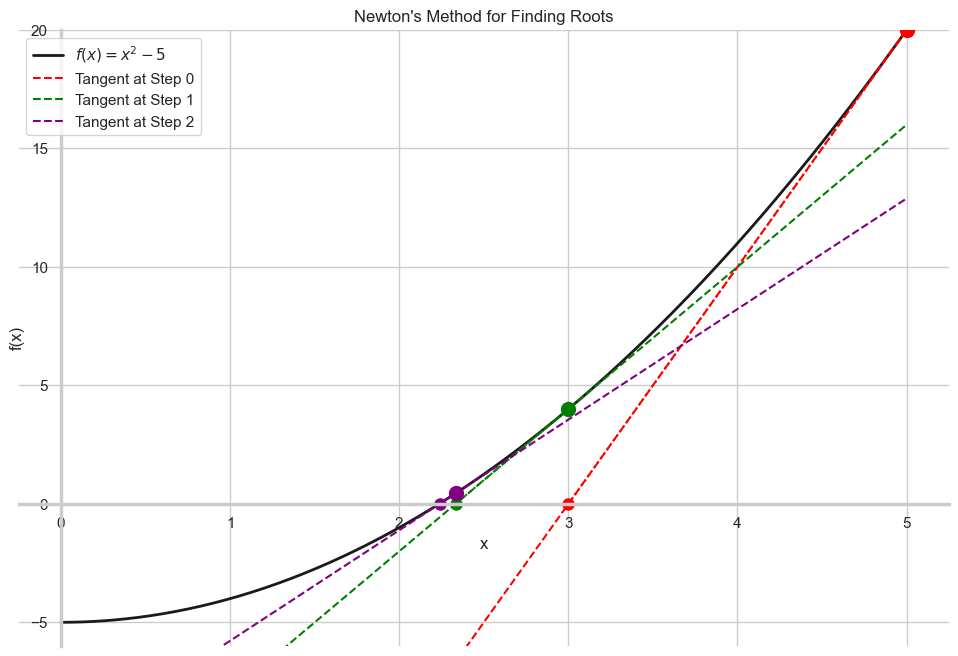

In [6]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Define a function and its derivative ---
def f(x):
    return x**2 - 5

def f_prime(x):
    return 2*x

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 8))
x_vals = np.linspace(0, 5, 400)
y_vals = f(x_vals)
ax.plot(x_vals, y_vals, 'k-', linewidth=2, label='$f(x) = x^2 - 5$')

# --- Perform Newton's method iterations ---
x_n = 5.0 # Starting point
tangent_colors = ['red', 'green', 'purple']

for i in range(3):
    f_xn = f(x_n)
    f_prime_xn = f_prime(x_n)

    # Plot the current point and tangent line with a unique color
    ax.plot(x_n, f_xn, 'o', color=tangent_colors[i], markersize=10)
    tangent = f_prime_xn * (x_vals - x_n) + f_xn
    ax.plot(x_vals, tangent, '--', color=tangent_colors[i], label=f'Tangent at Step {i}')

    # Calculate the next point
    x_n_plus_1 = x_n - f_xn / f_prime_xn

    # Plot the line to the x-axis
    ax.plot([x_n, x_n_plus_1], [f_xn, 0], ':', color=tangent_colors[i])
    ax.plot(x_n_plus_1, 0, 'o', color=tangent_colors[i], markersize=8)

    x_n = x_n_plus_1

# --- Format the plot ---
ax.set_title("Newton's Method for Finding Roots")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(-6, 20)

# Set the axis lines to be bold
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

plt.show()

--

## Deriving the Formula

We can derive the update rule for Newton's method from the definition of the slope. The slope of the tangent line at a point `xₖ` is `f'(xₖ)`.

Using the rise-over-run formula for the tangent line:
$$ \text{Slope} = f'(x_k) = \frac{\text{Rise}}{\text{Run}} = \frac{f(x_k) - 0}{x_k - x_{k+1}} $$

Now, we just need to solve this equation for our next point, $x_{k+1}$:
$$ x_k - x_{k+1} = \frac{f(x_k)}{f'(x_k)} $$
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$

This is the iterative update rule for Newton's method.

---
## Using Newton's Method for Optimization

How can we use a root-finding algorithm to find the **minimum** of a function?

We simply remember the rule from our previous lessons: **the minimum of a function `g(x)` occurs where its derivative `g'(x)` is zero.**

Therefore, to minimize `g(x)`, we can apply Newton's method to find the root of its derivative, `g'(x)`.

This leads to a slightly different update rule for optimization. Let's compare the two:

| Method | Goal | Update Rule |
| :--- | :--- | :--- |
| **Newton's Method (Root Finding)** | Find `x` such that `f(x) = 0` | $x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$ |
| **Newton's Method (Optimization)** | Find `x` such that `g'(x) = 0` | $x_{k+1} = x_k - \frac{g'(x_k)}{g''(x_k)}$ |

Notice that for optimization, we need to calculate both the first and the **second derivative** (`g''`) of our original function.